# **Assignment 2. Are Deeper Networks Better?**

* 使用Fully Connected Neural Network
* 在相同超參數設定下(batch_size=20; epochs=15; optimizer=‘Adam’)，比較10個不同深度(1 hidden layer, 5 hidden layers, 9 hidden layers,…, 37 hidden layers)神經網路模型的分類準確度
* 評論與回答”Are deeper networks better?” 



In [1]:
# Install old-version Tensorflow if necessary
#!pip install tensorflow==2.7.0

In [2]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist

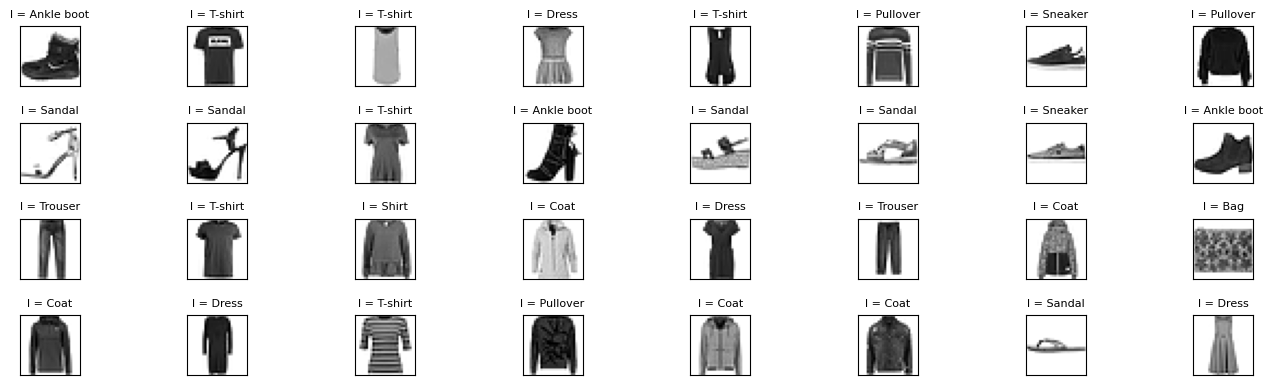

In [3]:
# Load Training Data and Testing From Mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = fashion_mnist.load_data()
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_multiimages(images, labels, prediction, idx, num=32):
    plt.gcf().set_size_inches(14, 4)
    if num > 32:
        num = 32
    for i in range(0, num):
        ax = plt.subplot(4, 8, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "l = " + class_names[int(labels[idx])]
        if len(prediction) > 0:
            title = "l = {}, p = {}".format(
                class_names[int(labels[idx])], class_names[prediction[idx]])
        else:
            title = "l = {}".format(class_names[int(labels[idx])])
        ax.set_title(title, fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.tight_layout()
    plt.show()

plot_multiimages(x_train_image, y_train_label, [], 0, 32)

# Reshape the Image From 2D Image to 1D Image of Size 28*28
x_train = x_train_image.reshape(len(x_train_image), 28*28).astype('float32')
x_test = x_test_image.reshape(len(x_test_image), 28*28).astype('float32')
x_train_norm = x_train/255
x_test_norm = x_test/255
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

In [4]:
# Build a Neural Network
list_hidden_layer = [1, 5, 9, 13, 17, 21, 25, 29, 33, 37]
list_val_accuracy = []
list_scores = []
cnt = 0

for i in range(len(list_hidden_layer)):
    model = Sequential()
    model.add(Dense(units=256, input_dim=28*28, activation='relu'))
    
    for j in range(list_hidden_layer[cnt]):
        model.add(Dense(units=256, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    model.summary() 
    
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    train_history = model.fit(x=x_train_norm[0:5000], y=y_TrainOneHot[0:5000], 
                              validation_split=0.2, epochs=10, batch_size=20, verbose=1)
    
    list_val_accuracy.append(train_history.history['val_accuracy'][-1])
    
    scores = model.evaluate(x_test_norm, y_TestOneHot)
    list_scores.append(scores[1])
    
    cnt += 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
200/200 [==============================] - 2s 5ms/step - loss: 0.8085 - accuracy: 0.7080 - val_loss: 0.5675 - val_accuracy: 0.7970
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5402 - accuracy: 0.8075 - val_loss: 0.4317 - val_accuracy: 0.8560
Epoch 3/10
200/200 [==========

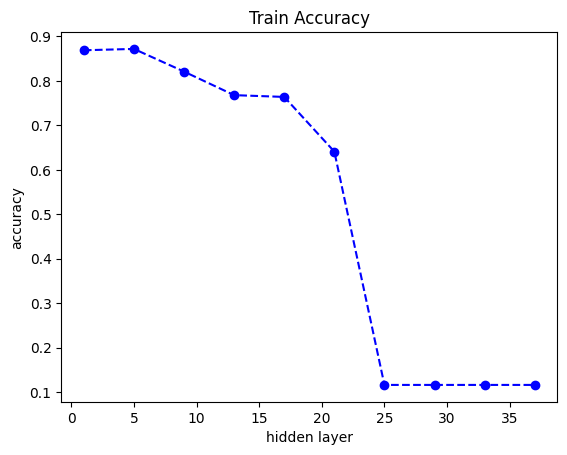

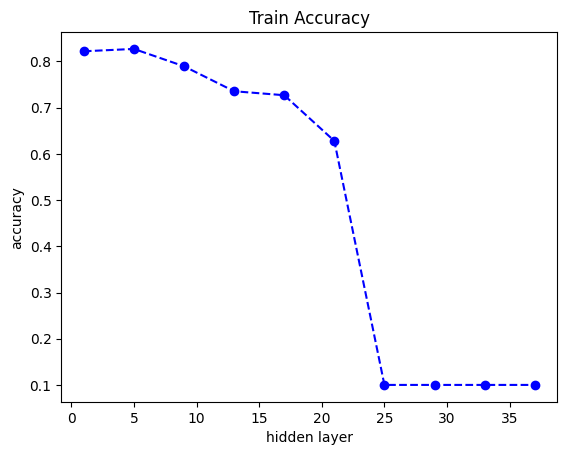

In [5]:
# Show Accuraccy
def show_train_accuracy(list_hidden_layer, list_val_accuracy):
    plt.plot(list_hidden_layer, list_val_accuracy, color='blue', marker='o', linestyle='dashed')
    plt.title('Train Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('hidden layer')
    plt.show()

show_train_accuracy(list_hidden_layer, list_val_accuracy)
show_train_accuracy(list_hidden_layer, list_scores)

32/32 [==============================] - 1s 6ms/step

	[Info] Show 10 prediction result (From 0):
[1 1 1 1 1 1 1 1 1 1]



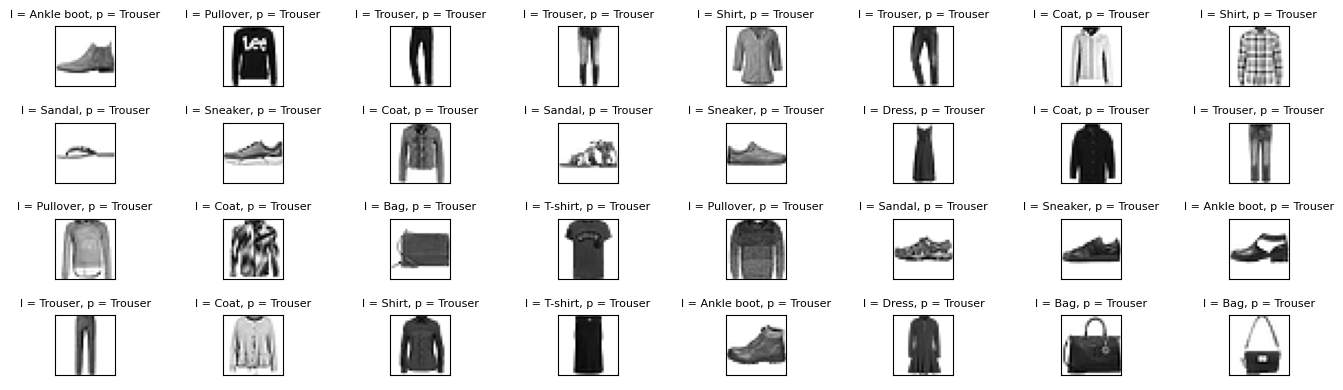

In [6]:
# Making prediction and save result to prediction
prediction_prob = model.predict(x_test_norm[0:1000])
prediction = np.argmax(prediction_prob, axis=1)

print()
print("\t[Info] Show 10 prediction result (From 0):")
print("%s\n" % (prediction[0:10]))
plot_multiimages(x_test_image, y_test_label, prediction, idx=0)